# Machine Learning

<font color='blue'> keywords:<font color='black'> 
    
**Tasks:** regression, classification, clustering  
**Algorithms:** linear regression, logistic regression, random forest, SVM, k-means  
**Evaluation Measures:** RMSE, precision, recall, F1-score  
**Concepts:** training and testing, overfitting and underfitting, cross-validation  
**R packages used:** tidyverse, rpart, randomForest, e1071, caret, mice, mltest  
  
  
    
The goal of this lab session is to get familar with various machine learning based tasks in R. Many packages in R have similar interface that uses a formula and other parameters.

**formula:** is a the to express the form of a model. For example, suppose you have a response variable y and independent variables x1, x2 and x3. To express that y depends linearly on x1, x2 and x3 you would use the formula `y ~ x1 + x2 + x3.`

# Supervised Learning

[Supervised learning](https://en.wikipedia.org/wiki/Supervised_learning) is the machine learning task of inferring a function from labeled data.

## Regression
[Regression](https://en.wikipedia.org/wiki/Regression_analysis) is the processes to estimate the relationships between a dependent variable (often called the 'outcome variable') and one or more independent variables (often called 'predictors', 'covariates', or 'features')

**Quizz:** Which of the following tasks are suitable to solve as a regression problem?

    ☐ Predicting the author of a book from a set of fiction authors.
    ☑ Predicting housing prices.
    ☐ Recognizing digits in an image of a handwritten text.
    ☐ Flagging whether an email is a spam or not.
    ☑ Predicting monthly sales of a store.
    ☐ Predicting if subscribers will churn at the end of the month.
    ☐ Personality prediction based on Twitter stream.
    ☑ Predicting the number of edits a Wikipedia editor will make next month.

**Linear Regression**

We will use the `lm()` function in the `stats` package which is part of base R. No external package needed.

    lm_model <- lm(y ∼ x1 + x2, data=mydata)
    summary(lm_model)

The vector of coefficients for the model is contained in `lm_model$coefficients.`

**Example**: We will start with building a simple model using the `cars` dataset that comes with R. The dataset contains the speed of cars and the distances taken to stop. In this example, we will build a linear regression model with only a **single feature**, i.e. to compute `dist` from `speed.`

In [ ]:
# view some first rows of the dataset
head(cars)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.1     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
`geom_smooth()` using method = 'loess'


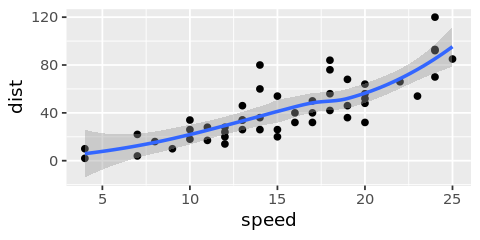

In [2]:
# now, lets visually examine the data

# load the required packages for plotting
library(tidyverse)
# set plot dimensions
options(repr.plot.width=4, repr.plot.height=2)

# draw the scatter plot between 'speed' and 'dist'
ggplot(data = cars, mapping = aes(x = speed, y = dist)) +
    geom_point() +
    geom_smooth()

**The above plot suggests that 'dist' can be computed from 'speed' through a linear function**

In [ ]:
# fit a linear regression model
cars_lm <- lm(dist ~ speed, data = cars)

**Understanding the fitted model**

In [ ]:
## summary of fitted model
summary(cars_lm)

**Question**: How fit is the fitted model? Refer to this [blog](https://boostedml.com/2019/06/linear-regression-in-r-interpreting-summarylm.html) for the intepretation of the summary of the linear regression model

**Using the fitted model for prediction**

In [ ]:
# example unseen data
df <- data.frame('speed' = c(2,3,4,7))
# prediction
predict(cars_lm, newdata = df)

**Example**: We will use another dataset that comes with R, `mtcars`, to build a model with **multiple features** to predict the fuel consumption `mpg.` The features describe different aspects of an automobile design and performance. We will also explore **which features to use**.

In [ ]:
head(mtcars)

In [ ]:
# Use the dataset mtcars to create a linear regression model to predict `mpg` using `wt, qsec, am` and `carb`. 
mtcars_lm <- lm(mpg ~ wt + qsec + am + carb, data = mtcars)
summary(mtcars_lm)

**Question**: Using the summary output of the model, to determine

    - Does the fitted model fits the dataset well?
    - What is the mathematical form of the model?
    - Is the coefficient for 'wt significant?
    - Is the coefficient for carb significant?

**Exercise:** Use the dataset mtcars to create a linear regression model to predict `mpg` using all features. Remove the top 3 least significant features from the dataset one by one to reduce the model without degrading the performance.

In [ ]:
# YOUR CODE GOES HERE

## fit model
mtcars_lm <- lm(mpg ~ ., data = mtcars)
summary(mtcars_lm)

## remove cyl, vs, gear
mtcars_lm <- lm(mpg ~ drat + wt + qsec + am + carb + disp + hp, data = mtcars)
summary(mtcars_lm)

## Classification

[Classification](https://en.wikipedia.org/wiki/Statistical_classification) is the problem of determining label(s) (e.g., categories or clasesses, etc.) of each data observation based on learning from labeled data.

**Quizz** which of the following tasks are classification problems?

    ☑ Deciding whether to buy, sell or hold a stock.
    ☑ Predicting the winner of an election with six parties.
    ☑ Telling whether or not revenue will exceed $100,000.
    ☐ Forecasting the weekly revenue of a company.
    ☐ Predicting the number of daily bike thefts in a city.

### Widely used (shallow) classification models

[**Logistic Regression**](https://en.wikipedia.org/wiki/Logistic_regression)

Provided in `stats` package, which is automatically loaded when starting R  

    glm_model <- glm(y ∼ x1 + x2, family = binomial, data = mydata)  

[**K-Nearest Neighbor**](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

Install and load the `class` package

    knn_model <- knn(train=X_train, test=X_test, cl=as.factor(labels), k=K)
    
`knn_model` is a factor vector of class attributes for the test set.

[**Decision Trees (CART)**](https://en.wikipedia.org/wiki/Decision_tree_learning)

Install and load the `rpart` package.

    cart_model <- rpart(y ∼ x1 + x2, data=mydata, method="class")
 
You can use `plot.rpart` and `text.rpart` to plot the decision tree

[**Random Forest**](https://en.wikipedia.org/wiki/Random_forest)

Install and load the `randomForest` package


    rf_model <- randomForest(y ~ x1 + x2, data=train, importance=TRUE, ntree=50)


[**Support Vector Machines (SVM)**](https://en.wikipedia.org/wiki/Support-vector_machine)

Install and load the `e1071` package.

    svm_model <- svm(x=X, y=as.factor(labels), kernel ="radial", cost=C)

**Example**: we will use the above models to predict `survivors` in the [Titanic dataset](https://www.kaggle.com/c/titanic). The dataset also provided under `data/titanic.csv`

In [ ]:
# load, view data examples, and summarize the dataset
titanic <- read_csv('data/titanic.csv', skip=5)
head(titanic)
summary(titanic)

**Note**: most models do not work with `character` type, we need to convert strings to factors for later use

In [ ]:
titanic$Sex <- as.factor(titanic$Sex)
titanic$Cabin <- as.factor(titanic$Cabin)
titanic$Embarked <- as.factor(titanic$Embarked)
titanic$Survived <- as.factor(titanic$Survived)

**Training and Testing data**

split the titanic data into training and testing sets based on the feature we want to predict `Survived`.

In [ ]:
titanic_training <- filter(titanic, !is.na(Survived))
dim(titanic_training)
titanic_testing <- filter(titanic, is.na(Survived))
dim(titanic_testing)

In [ ]:
# check if there is missing value in training data
summary(titanic_training)

In [ ]:
# check if there is missing value in test data
summary(titanic_testing)

Predicting `Survived` based on `Pclass` and `Sex` using Logistic Regression

In [ ]:
# train the model
titanic_glm <- glm(Survived ~ Pclass + Sex, data = titanic_training, family = binomial)

# examine the model
summary(titanic_glm)

**Observation**: the coefficient for Sexmale is significantly negative. Why?

In [ ]:
# Apply the trained model for predict the survivor in test set
titanic_testing$Survived <- predict(titanic_glm, titanic_testing, type="response") # Question: why type="response"
titanic_testing$Survived

**Practice**: train a `random forest` for predicting  `Survived` based on `Pclass` and `Sex`, then apply the model on test set

In [12]:
# YOUR CODE GOES HERE

# install.packages('randomForest')
library(randomForest)

# train the model
titanic_rf <- randomForest(Survived ~ Pclass + Sex, data = titanic_training, importance=TRUE, ntree=10)

# examine the model
summary(titanic_rf)

# Apply the trained model for predict the survivor in test set

titanic_testing$Survived <- predict(titanic_rf, titanic_testing)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:dplyr’:

    combine

The following object is masked from ‘package:ggplot2’:

    margin



ERROR: Error in eval(m$data, parent.frame()): object 'titanic_training' not found


### Model Performance

#### Measures of goodness
We trained and applied some models to predict labels for un-labeled data, but how can we say if the model is good?

The goodness of prediction models are measured w.r.t some dataset with groudtruth -- i.e., we need the labels for observations in test data. Typical measures for the goodness of the classification models are [Precision, Recall](https://en.wikipedia.org/wiki/Precision_and_recall), and [F1 scores](https://en.wikipedia.org/wiki/F1_score)

**Example**: we will train a model and evaluate its performance using [Iris dataset]

In [24]:
# read the dataset
iris <- read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', col_names = FALSE)

# name the columns
names(iris) <- c('sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class')

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_character()
)


In [25]:
# view some rows
head(iris)

# view columns's data type
str(iris)

sepal_length,sepal_width,petal_length,petal_width,class
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa


Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	150 obs. of  5 variables:
 $ sepal_length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ sepal_width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ petal_length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ petal_width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ class       : chr  "Iris-setosa" "Iris-setosa" "Iris-setosa" "Iris-setosa" ...
 - attr(*, "spec")=List of 2
  ..$ cols   :List of 5
  .. ..$ X1: list()
  .. .. ..- attr(*, "class")= chr  "collector_double" "collector"
  .. ..$ X2: list()
  .. .. ..- attr(*, "class")= chr  "collector_double" "collector"
  .. ..$ X3: list()
  .. .. ..- attr(*, "class")= chr  "collector_double" "collector"
  .. ..$ X4: list()
  .. .. ..- attr(*, "class")= chr  "collector_double" "collector"
  .. ..$ X5: list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  ..$ default: list()
  .. ..- attr(*, "class")= chr  "collector_guess" "collector"
  ..- attr(*, "class")

In [26]:
# convert `class` from string to factor
iris$class <- as.factor(iris$class)

To evaluate the models, often we **divide** the set of labeled data into **training and test sets**. The models will be **trained on the training set**, and **evaluated using the test set**

In [27]:
# divide the iris dataset into: 80% for training set and the remaining 20% for test set 
training_size <- floor(0.8 * nrow(iris))
train_indexes <- sample(seq_len(nrow(iris)), size = training_size)
iris_train <- iris[train_indexes, ]
iris_test <- iris[-train_indexes, ]

Train a svm model to predict `class` from `sepal_length` and `sepal_width`

In [28]:
# install and load the 'e1071' package if not yet
# install.packages('e1071')
library(e1071)

In [29]:
# set the features
features <- c('sepal_length', 'sepal_width')
# train a svm model
svm_model <- svm(x=iris_train[features], y=iris_train$class, kernel ="linear", cost=1)

We now evaluate the trained model using the test set

In [30]:
# install and load the 'mltest' package if not yet
# install.packages('mltest', repos = 'https://cran.r-project.org/')
library(mltest)

In [31]:
# get the prediction
predicted_labels <- as.factor(predict(svm_model, iris_test[features]))

# get the groundtruth
true_labels <- as.factor(iris_test$class)

# measure the performance
classifier_metrics <- ml_test(predicted_labels, true_labels, output.as.table = FALSE)

In [32]:
# overall classification accuracy
classifier_metrics$accuracy

[1] 0.8

In [33]:
# precision for classes
classifier_metrics$precision

Iris-setosa Iris-versicolor  Iris-virginica 
      1.0000000       0.6666667       0.6250000

In [34]:
# recall for classes
classifier_metrics$recall

Iris-setosa Iris-versicolor  Iris-virginica 
      1.0000000       0.6666667       0.6250000

In [35]:
# F1-measures for classes
classifier_metrics$F1

Iris-setosa Iris-versicolor  Iris-virginica 
      1.0000000       0.6666667       0.6250000

**Exercise:** divide the iris dataset into training and test sets by ratio 9:1, train a svm model to predict `class` using all feature, then examine the performance of trained model

In [36]:
# YOUR CODE GOES HERE

#divide the iris dataset into training and test sets by ratio 50:50
training_size <- floor(0.5 * nrow(iris))
train_indexes <- sample(seq_len(nrow(iris)), size = training_size)
iris_train <- iris[train_indexes, ]
iris_test <- iris[-train_indexes, ]

# set the features
features <- c('sepal_length', 'sepal_width', 'petal_length', 'petal_width')
# train a svm model
svm_model <- svm(x=iris_train[features], y=iris_train$class, kernel ="linear", cost=1)

# get the prediction
predicted_labels <- as.factor(predict(svm_model, iris_test[features]))

# get the groundtruth
true_labels <- as.factor(iris_test$class)

# measure the performance
classifier_metrics <- ml_test(predicted_labels, true_labels, output.as.table = FALSE)


# precision for classes
classifier_metrics$precision
# recall for classes
classifier_metrics$recall
# F1-measures for classes
classifier_metrics$F1

Iris-setosa Iris-versicolor  Iris-virginica 
      1.0000000       0.9655172       0.9545455

Iris-setosa Iris-versicolor  Iris-virginica 
      1.0000000       0.9655172       0.9545455

Iris-setosa Iris-versicolor  Iris-virginica 
      1.0000000       0.9655172       0.9545455

## Underfitting and Overfitting

Underfitting happens when the trained model does not fit well with the training data, and thus often lead to poor performance on test data

[Overfitting](https://en.wikipedia.org/wiki/Overfitting) happens when the trained model fit too well with the training data while perform (predict) poorly on test data


**Example**: Use the above excercise, change the to ratio 5:95 and 10:90, and change the number of tree (`ntree`) in the model to 1 and 10. Examine the performance of the trained model on training and test sets.

In [40]:
# YOUR CODE GOES HERE

training_size <- floor(0.05 * nrow(iris))
train_indexes <- sample(seq_len(nrow(iris)), size = training_size)
iris_train <- iris[train_indexes, ]
iris_test <- iris[-train_indexes, ]

# train a random forest model
iris_rf <- randomForest(class ~ sepal_length + sepal_width, data = iris_train, importance=TRUE, ntree=10)

# get the groundtruth
true_labels <- as.factor(iris_train$class)
# get the prediction
predicted_labels <- as.factor(predict(iris_rf, iris_train))

# measure the performance
classifier_metrics <- ml_test(predicted_labels, true_labels, output.as.table = FALSE)
# F1-measures for classes
classifier_metrics$F1



# get the groundtruth
true_labels <- as.factor(iris_test$class)
# get the prediction
predicted_labels <- as.factor(predict(iris_rf, iris_test))

# measure the performance
classifier_metrics <- ml_test(predicted_labels, true_labels, output.as.table = FALSE)
# F1-measures for classes
classifier_metrics$F1




Iris-setosa Iris-versicolor  Iris-virginica 
              1               1               1

Iris-setosa Iris-versicolor  Iris-virginica 
      0.9126214       0.6346154       0.5569620

### Cross Validation

As we see in the previous section, the performance of models are highly dependent of the datasets. Hence, their performance can be high or low by chance, e.g., by the way we divide the original labeled dataset into training and test set. To reduce the effect of the chance, or to get more robust, reliable measures for the performance, we need to run K-fold [cross validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)

Basically, K-fold cross validation includes:

- Devide the labeled dataset in to K equal folds
- In turn, take one fold as test set, the union of other K-1 folds is used as train set
- Train a model for each division of training & test sets, i.e., K models in total
- Evaluate each model on corresponding test set
- Aggregate the peformance of K models to form the final performance

The prediction is for a new data observation is then formed by aggreating (e.g., voting base) the predictions of the above K models

Refer to `trainControl` object and `train` function in `caret` package for more information

### Feature importance
One important aspect of the shallow classification models is the importance score of features in (trained) models. These scores inform us how important the features are in predicting the label of data observations.

**Example** we will examine the importance of features in `random forest` and `svm` (with `linear kernel`) models

In [ ]:
# finding the importance scores of features in `random forest` model is quite simple

# train a random forest model
iris_rf <- randomForest(class ~ ., data = iris, importance=TRUE, ntree=10)

# get the features importance
imp <- importance(iris_rf, type=1)
featureImportance <- tibble(Feature=row.names(imp), Importance=imp[,1])

# show the importance scores
featureImportance

# visualizing the importance scores
ggplot(featureImportance, aes(x=reorder(Feature, Importance), y=Importance)) +
    geom_bar(stat="identity", fill='darkblue') +
    coord_flip() +
    xlab("")

In [ ]:
# It is a bit more complicated with SVM-linear model

# set the features
features <- c('sepal_length', 'sepal_width', 'petal_length', 'petal_width')
# train a svm model
svm_model <- svm(x=iris[features], y=iris$class, kernel ="linear", cost=1)
w <- t(svm_model$coefs) %*% svm_model$SV        # weight vectors
w <- apply(w, 2, function(v){sqrt(sum(v^2))})  # weight
w <- sort(w, decreasing = T)
print(w)

### Exercise
Using [US's income dataset](https://archive.ics.uci.edu/ml/datasets/Adult), train a random forest model for predicting `income` from all other features, examine the importance of the features for the prediction.

Parsed with column specification:
cols(
  X1 = col_integer(),
  X2 = col_character(),
  X3 = col_integer(),
  X4 = col_character(),
  X5 = col_integer(),
  X6 = col_character(),
  X7 = col_character(),
  X8 = col_character(),
  X9 = col_character(),
  X10 = col_character(),
  X11 = col_integer(),
  X12 = col_integer(),
  X13 = col_integer(),
  X14 = col_character(),
  X15 = col_character()
)


Feature,Importance
age,3.5945641
workclass,6.2591816
fnlwgt,0.3867257
education,3.2916342
education_num,3.0059581
marital_status,6.1889564
occupation,6.8541051
relationship,4.7061863
race,3.2044790
sex,3.8744382


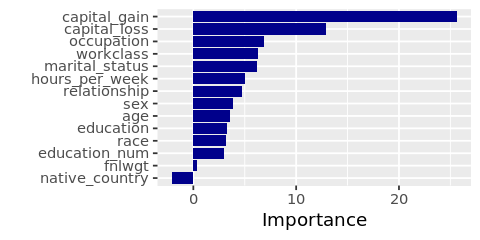

In [22]:
# YOUR CODE GOES HERE

# Hint: columns of character data type should be converted into factor before traning and testing the model

# read the dataset
adult <- read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', col_names = FALSE)

# rename the columns
names(adult) <- c('age', 'workclass', 'fnlwgt', 'education','education_num', 'marital_status', 
                  'occupation', 'relationship', 'race',
                  'sex', 'capital_gain', 'capital_loss','hours_per_week', 'native_country', 'income')

# convert string columns into facto
adult$workclass <- as.factor(adult$workclass)
adult$education <- as.factor(adult$education)
adult$marital_status <- as.factor(adult$marital_status)
adult$occupation <- as.factor(adult$occupation)
adult$relationship <- as.factor(adult$relationship)
adult$race <- as.factor(adult$race)
adult$sex <- as.factor(adult$sex)
adult$native_country <- as.factor(adult$native_country)
adult$income <- as.factor(adult$income)

# train a random forest to predict income
adult_rf <- randomForest(income ~ ., data = adult, importance=TRUE, ntree=10)

# get the features importance
imp <- importance(adult_rf, type=1)
featureImportance <- tibble(Feature=row.names(imp), Importance=imp[,1])

# show the importance scores
featureImportance

# visualizing the importance scores
ggplot(featureImportance, aes(x=reorder(Feature, Importance), y=Importance)) +
    geom_bar(stat="identity", fill='darkblue') +
    coord_flip() +
    xlab("")

# Unsupervised Learning

[Unsupervised machine learning](https://en.wikipedia.org/wiki/Unsupervised_learning) is the machine learning task of uncovering the hidden structure from "unlabeled" data.

**Quizz:** Which of the following tasks are suitable to solve with clustering?

    ☑ Segmenting an MRI image.
    ☐ Predicting the category of a product based on its image(s).
    ☑ Identifying groups of customers with similar behavior.
    ☐ Predicting monthly sales of a store.
    ☐ Predicting the type of dog breed from 120 breeds of dogs.

**K-Means Clustering**
    
    kmeans_model <- kmeans(x=X, centers=m)

In this exercise, we will use movies data on the [MovieLens 100K Dataset](http://files.grouplens.org/datasets/movielens/ml-100k/u.item) collected from the [MovieLens web site](http://movielens.org). It is available as `data/movies.txt` inside the directory of this lab exercise.

In [ ]:
movies <- read_delim('data/movies.txt', delim = '|')

In [ ]:
# Inspecting and preprocessing

# check top records
head(movies)

# remove duplicates
movies <- distinct(movies)

# Mow many movies are tagged as Comedy
filter(movies, Comedy == 1) %>% count()

# How many movies are tagged as Romance and Drama?
filter(movies, Romance == 1 & Drama == 1) %>% count()

In [ ]:
# building a k-means cluster
k = 5
iters = 1000
set.seed(1)

movies <- select(movies, -Title)
movie_kmeans <- kmeans(movies, centers = k, iter.max=iters)

**Understanding Clustering Output**

In [ ]:
# view clustering output
str(movie_kmeans)

In [ ]:
# cluster vector, i.e., cluster index of each row
movie_kmeans$cluster

In [ ]:
# centroid values
movie_kmeans$centers

In [ ]:
# size of clusters, i.e., number of movies in each cluster
movie_kmeans$size

In [ ]:
# within-cluster sum of squares
movie_kmeans$withinss

**Determining number of clusters**

One way to select the number of clusters is by using a **scree plot**. A standard scree plot has the number of clusters on the x-axis, and the sum of the within-cluster sum of squares on the y-axis. The within-cluster sum of squares for a cluster is the sum, across all points in the cluster, of the squared distance between each point and the centroid of the cluster. To determine the best number of clusters using this plot, we want to look for a bend, or elbow, in the plot.

In [ ]:
set.seed(99)

# Call kmeans function with centers = 3, centers = 4, etc
num_clusters = seq(5, 15,1)

# within-cluster sum of squares for all clusters
sum_withinss = sapply(num_clusters, function(x) sum(kmeans(movies, centers=x, iter.max=2000)$withinss))

# visualize
ggplot(mapping = aes(x=num_clusters, y=sum_withinss)) +
    geom_line() +
    geom_point()
    
# 12 seems like a good pick

# References

[Top 10 algorithms in data mining](http://www.cs.uvm.edu/~icdm/algorithms/10Algorithms-08.pdf)

[R for Statistical Learning](https://daviddalpiaz.github.io/r4sl/)

[The caret Package](http://topepo.github.io/caret/)

[Linear Regression: r-statistics.co](http://r-statistics.co/Linear-Regression.html)

[Tutorial: SVM in R](http://math.stanford.edu/~yuany/course/2015.fall/SVM_in_R.pdf)

[Artificial Neural Networks in R](https://rpubs.com/julianhatwell/annr)

[Cluster analysis in R: determine the optimal number of clusters](https://stackoverflow.com/questions/15376075/cluster-analysis-in-r-determine-the-optimal-number-of-clusters)